## 정규화, 히트맵, 상관관계 보기!

In [1]:
import pandas as pd


In [2]:
subway=pd.read_csv('../Data/FinalDataset/2022-01-01 ~2022-12_31_dataset.csv')
subway.head()

# subway.columns


,Unnamed: 0,연번,수송일자,호선,역사코드,역명,승하차구분,05,06,07,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,0,425,2022-01-01,7,2711,장암,승차,6,7,20,...,10.0,9.0,9.0,12.0,10.0,9.0,8.0,4.0,6.0,0.0
1,1,426,2022-01-01,7,2711,장암,하차,2,18,9,...,10.0,9.0,9.0,12.0,10.0,9.0,8.0,4.0,6.0,0.0
2,2,969,2022-01-02,7,2711,장암,승차,8,15,21,...,10.0,9.0,9.0,12.0,10.0,9.0,8.0,4.0,6.0,0.0
3,3,970,2022-01-02,7,2711,장암,하차,2,9,20,...,10.0,9.0,9.0,12.0,10.0,9.0,8.0,4.0,6.0,0.0
4,4,1513,2022-01-03,7,2711,장암,승차,61,273,597,...,10.0,9.0,9.0,12.0,10.0,9.0,8.0,4.0,6.0,0.0


## 히트맵 확인!

/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/p

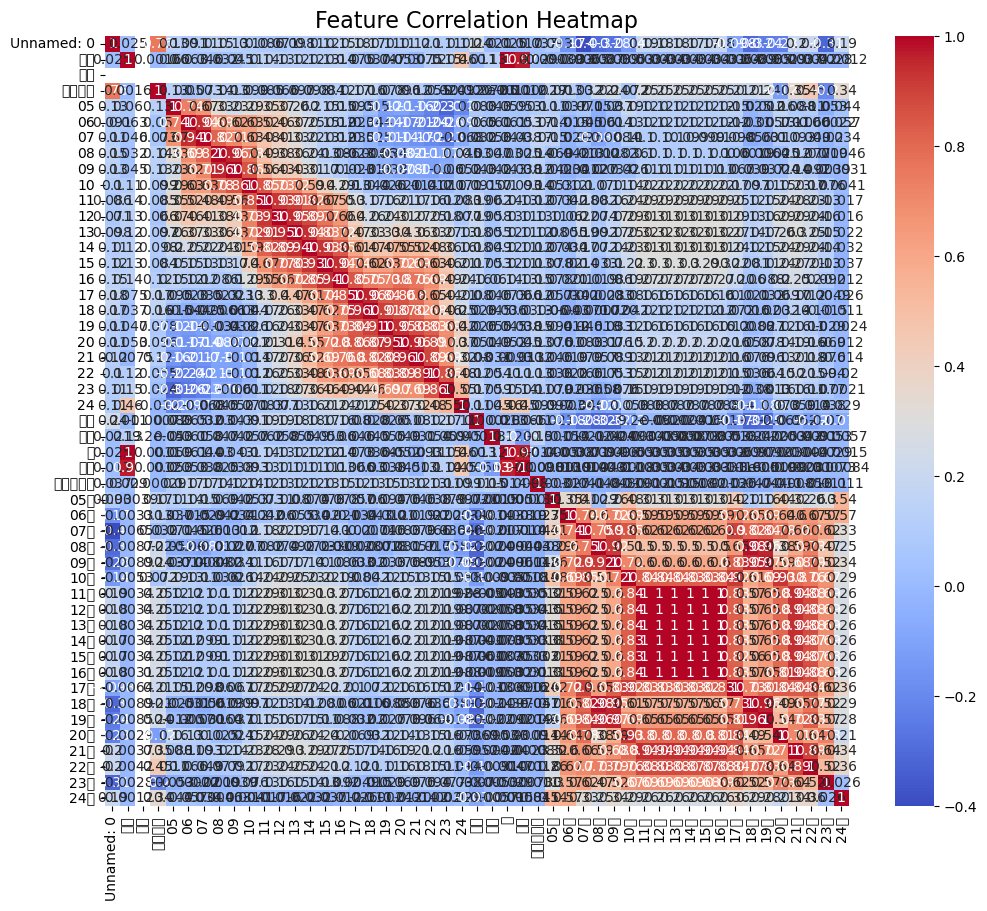

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# 숫자형 데이터만 선택
numeric_data = subway.select_dtypes(include=['float64', 'int64'])

# 상관관계 계산
corr = numeric_data.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()

In [3]:
# # '수송일자' 컬럼 데이터 타입 float로 변경
# subway['수송일자'] = subway['수송일자'].astype(float)

In [4]:

# label = subway['05']
# t= subway['15시']
# d= subway['수송일자']
# c= subway['역사코드']
# # h = subway['height']
# wh = pd.concat([t,d,c], axis = 1)

# from sklearn.model_selection import train_test_split

# train_data, test_data, train_label, test_label = \
#   train_test_split(wh, label, stratify = label)

In [5]:
# import pandas as pd
# from sklearn.model_selection import train_test_split

# # 컬럼 중복 제거
# subway = subway.loc[:, ~subway.columns.duplicated()]

# # 특성 변수와 타깃 변수 지정
# X = subway[['15시', '수송일자', '역사코드']]
# y = subway['05']

# # 학습 데이터와 테스트 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
#, '수송일자', '역명', '승하차구분''주중주말','공휴일여부',
# 특성 변수(X) 컬럼 선택
features = [ '호선', '역사코드', '요일', '년도', '월', '주차',   '05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시', '24시']
X = subway[features]

# 타깃 변수(y) 컬럼 선택
targets = ['05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']
y = subway[targets]

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# SVM
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 예측값과 실제값 비교
for i, target in enumerate(targets):
    print(f"{target} 컬럼 예측값 vs 실제값:")
    print(f"예측값: {y_pred[:, i][:5]}") # 예측값 중 처음 5개만 출력
    print(f"실제값: {y_test[target].values[:5]}\n") # 실제값 중 처음 5개만 출력
    # # 퍼센트 차이 계산
    # mape = mean_absolute_percentage_error(y_test[target], y_pred[:, i])
    # print(f"{target} 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: {mape * 100:.2f}%\n")

05 컬럼 예측값 vs 실제값:
예측값: [132.59495987 126.56956082 185.21055345  81.51922836 205.13395476]
실제값: [171 251 406  28  44]

06 컬럼 예측값 vs 실제값:
예측값: [315.24883953 431.72538301 308.69124796 257.57391252 449.89688956]
실제값: [314 899 339 184 222]

07 컬럼 예측값 vs 실제값:
예측값: [ 780.1893053  1088.68510273  949.40000403  514.27747758 1068.40719686]
실제값: [ 951 2543  523  197  188]

08 컬럼 예측값 vs 실제값:
예측값: [1609.73801382 1799.52689822 1945.18084964 1206.62889433 1308.27706548]
실제값: [1350 2549  841  267  409]

09 컬럼 예측값 vs 실제값:
예측값: [1003.34740051 1149.50126867 1145.34937121  976.95406161  852.75140138]
실제값: [ 716 1216  541  476  714]

10 컬럼 예측값 vs 실제값:
예측값: [515.77000446 656.24122628 580.41172194 600.07056718 655.9805023 ]
실제값: [366 766 338 459 590]

11 컬럼 예측값 vs 실제값:
예측값: [440.48755831 549.7415418  510.05417797 553.02347811 626.4080995 ]
실제값: [351 744 294 559 521]

12 컬럼 예측값 vs 실제값:
예측값: [477.93809619 578.01931319 537.56582624 575.37880372 667.41025761]
실제값: [337 755 357 562 497]

13 컬럼 예측값 vs 실제값:
예측값: [51

In [8]:
# RandomForest
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 예측값과 실제값 비교
for i, target in enumerate(targets):
    print(f"{target} 컬럼 예측값 vs 실제값:")
    print(f"예측값: {y_pred[:, i][:5]}") # 예측값 중 처음 5개만 출력
    print(f"실제값: {y_test[target].values[:5]}\n") # 실제값 중 처음 5개만 출력
    # # 퍼센트 차이 계산
    mape = mean_absolute_percentage_error(y_test[target], y_pred[:, i])
    print(f"{target} 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: {mape * 100:.2f}%\n")

05 컬럼 예측값 vs 실제값:
예측값: [109.  55.  28. 131. 130.]
실제값: [171 251 406  28  44]

05 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: 4917555003810947.00%

06 컬럼 예측값 vs 실제값:
예측값: [255. 243.  98. 181. 239.]
실제값: [314 899 339 184 222]

06 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: 126.73%

07 컬럼 예측값 vs 실제값:
예측값: [849. 640. 219. 214. 378.]
실제값: [ 951 2543  523  197  188]

07 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: 161.62%

08 컬럼 예측값 vs 실제값:
예측값: [1502.5  923.   698.   357.   587. ]
실제값: [1350 2549  841  267  409]

08 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: 139.09%

09 컬럼 예측값 vs 실제값:
예측값: [591.5 691.  371.  536.  513. ]
실제값: [ 716 1216  541  476  714]

09 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: 115.15%

10 컬럼 예측값 vs 실제값:
예측값: [322.5 471.  343.  603.  492. ]
실제값: [366 766 338 459 590]

10 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: 58.80%

11 컬럼 예측값 vs 실제값:
예측값: [308. 488. 347. 705. 436.]
실제값: [351 744 294 559 521]

11 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: 35.94%

12 컬럼 예측값 vs 실제값:
예측값: [328. 586. 290. 741. 459.]
실제값: [337 755 357 562 497]

12 컬럼 예측값과 실제값의 평균 절대 퍼센트 차이: 26.48%

13 컬럼 예측값 vs 실제값:
예